In [118]:
def TWO_SEQUENCE(l):
    two_sequence = []
    if len(l) == 1:
        two_sequence.append(l[0]+'-'+l[0])
    else:
        q = []
        q.append(l[0])
        n = len(l)
        i = 1
        while i<n:
            var = q[0]
            two_sequence.append(var+'-'+l[i])
            q.append(l[i])
            i+=1
            q.pop(0)
    return two_sequence

In [119]:
import glob

In [120]:
list_of_filesB = glob.glob("Dataset-20201023T162720Z-001/Dataset/B/sys/*.txt")
list_of_filesM = glob.glob("Dataset-20201023T162720Z-001/Dataset/M/sys/*.txt")

In [121]:
def FileToTwoSequenceList(filename):
    l1 = []
    f = open(filename)
    for line in f:
        l1.append(line)
    f.close()
    n = len(l1)
    if n<2:
        return []
    else:
        l = TWO_SEQUENCE(l1)
    return l

In [133]:
def computeTF(wordDict,bow):
    tfDict = {}
    c = len(bow)
    for word,count in wordDict.items():
        if c>0:
            tfDict[word] = count/float(c)
        else:
            tfDict[word] = 0;
    return tfDict

In [134]:
def computeIDF(docList):
    import math
    idfDict = {}
    n = len(docList)
    idfDict = dict.fromkeys(docList[0].keys(),0)
    for doc in docList:
        for word,val in doc.items():
            if val>0:
                idfDict[word] += 1
    for word,val in idfDict.items():
        if val>0:
            idfDict[word] = math.log((n)/float(val))
        else:
            idfDict[word] = 0
    return idfDict

In [124]:
def computeTFIDF(tfVec,idfs):
    tfidf = {}
    for word,val in tfVec.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [125]:
l = []
wordSetTwoSequence = set([])
for filename in list_of_filesB:
    l = FileToTwoSequenceList(filename)
    wordSetTwoSequence = wordSetTwoSequence.union(set(l))
l = []
for filename in list_of_filesM:
    l = FileToTwoSequenceList(filename)
    wordSetTwoSequence = wordSetTwoSequence.union(set(l))

In [126]:
if '\n-\n' in wordSetTwoSequence:
    wordSetTwoSequence.remove('\n-\n')

In [127]:
l = []
output = []
for filename in list_of_filesB:
    wordDict = dict.fromkeys(wordSetTwoSequence,0)
    l1 = FileToTwoSequenceList(filename)
    for word in l1:
        if word != '\n-\n':    
            wordDict[word] += 1
    l.append(wordDict)
    output.append(0)
for filename in list_of_filesM:
    wordDict = dict.fromkeys(wordSetTwoSequence,0)
    l1 = FileToTwoSequenceList(filename)
    for word in l1:
        if word != '\n-\n':
            wordDict[word] += 1
    l.append(wordDict)
    output.append(1)

In [128]:
list_of_files = list_of_filesB+list_of_filesM

In [135]:
c = 0
TFS = []
for dictionary in l:
    filename = list_of_files[c]
    l1 = FileToTwoSequenceList(filename)
    dictionary = computeTF(dictionary,l1)
    TFS.append(dictionary)
    c+=1

In [136]:
idfs = computeIDF(l)

In [137]:
TFIDFS = []
for dictionary in TFS:
    dictionary = computeTFIDF(dictionary,idfs)
    TFIDFS.append(dictionary)

In [138]:
import pandas as pd

In [139]:
df_two_sequence = pd.DataFrame(TFIDFS)

In [140]:
df_two_sequence['output'] = output

In [141]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame()
y = pd.DataFrame()
X = df_two_sequence.drop(['output'],axis='columns')
y = df_two_sequence.output

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)
len(X_train),len(X_test),len(y_train),len(y_test)

(4076, 1747, 4076, 1747)

In [143]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [144]:
accuracies = []

In [145]:
accuracies.append(model.score(X_test,y_test))

In [146]:
from sklearn.svm import SVC

In [147]:
model_linear = SVC(kernel='linear')
model_rbf = SVC(kernel='rbf')

In [148]:
model_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [149]:
accu = model_linear.score(X_test,y_test)

In [150]:
accuracies.append(accu)

In [151]:
model_rbf.fit(X_train,y_train)

SVC()

In [152]:
accu = model_rbf.score(X_test,y_test)

In [153]:
accuracies.append(accu)

In [154]:
from matplotlib import pyplot as plt

In [155]:
from sklearn import metrics

In [156]:
def ROC(model,X_test,y_test):
    metrics.plot_roc_curve(model,X_test,y_test)

In [157]:
from sklearn.metrics import precision_recall_fscore_support

In [158]:
def PRINT_METRICS(model_name,y,y_pred,accuracies,index):
    l = []
    t = precision_recall_fscore_support(y,y_pred,average='macro')
    l.append(t[0])
    l.append(t[1])
    l.append(t[2])
    l.append(accuracies[index])
    print(model_name)
    print('Precision:'+str(l[0])+'|Recall:'+str(l[1])+'|F1_measure:'+str(l[2])+'|accuracy:'+str(l[3]))

In [159]:
y = []
for val in y_test:
    y.append(val)

In [160]:
y_pred = model.predict(X_test)

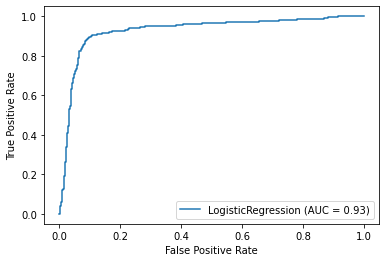

In [161]:
#Metrics for Logistics Regression
ROC(model,X_test,y_test)

In [162]:
PRINT_METRICS('MODEL:LOGISTICS_REGRESSION',y,y_pred,accuracies,0)

MODEL:LOGISTICS_REGRESSION
Precision:0.7728894253336016|Recall:0.554172490448997|F1_measure:0.4711797176406977|accuracy:0.6090440755580996


In [163]:
#printing metrics of SVM(Linear)
y_pred = model_linear.predict(X_test)

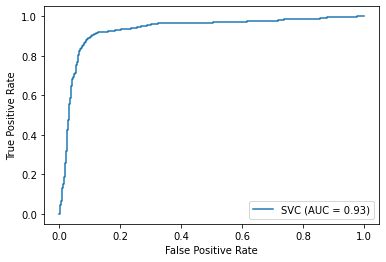

In [164]:
ROC(model_linear,X_test,y_test)

In [165]:
PRINT_METRICS('MODEL:SVM(LINEAR)',y,y_pred,accuracies,1)

MODEL:SVM(LINEAR)
Precision:0.7783812905761647|Recall:0.554681655418447|F1_measure:0.4715359094457455|accuracy:0.609616485403549


In [166]:
y_pred = model_rbf.predict(X_test)

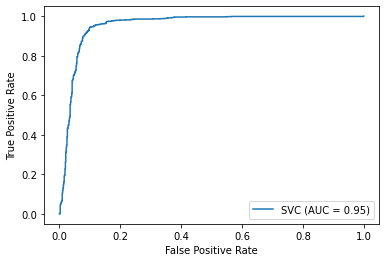

In [167]:
ROC(model_rbf,X_test,y_test)

In [168]:
#printing metrics for SVM(RBF)
PRINT_METRICS('MODEL:SVM(RBF)',y,y_pred,accuracies,2)

MODEL:SVM(RBF)
Precision:0.8953763279767444|Recall:0.9004825419645115|F1_measure:0.8967362140981734|accuracy:0.8975386376645679


In [99]:
#now metrics for Boolean-occurance
l = []
wordSetTwoSequence = set([])
for filename in list_of_filesB:
    l = FileToTwoSequenceList(filename)
    wordSetTwoSequence = wordSetTwoSequence.union(set(l))
l = []
for filename in list_of_filesM:
    l = FileToTwoSequenceList(filename)
    wordSetTwoSequence = wordSetTwoSequence.union(set(l))

In [100]:
l = []
output = []
for filename in list_of_filesB:
    wordDict = dict.fromkeys(wordSetTwoSequence,0)
    l1 = FileToTwoSequenceList(filename)
    for word in l1:
        if word != '\n-\n':    
            wordDict[word] = 1
    l.append(wordDict)
    output.append(0)
for filename in list_of_filesM:
    wordDict = dict.fromkeys(wordSetTwoSequence,0)
    l1 = FileToTwoSequenceList(filename)
    for word in l1:
        if word != '\n-\n':
            wordDict[word] = 1
    l.append(wordDict)
    output.append(1)

In [101]:
df = pd.DataFrame(l)

In [102]:
df['output'] = output
X = pd.DataFrame()
y = pd.DataFrame()
X = df.drop(['output'],axis='columns')
y = df.output

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)
len(X_train),len(X_test),len(y_train),len(y_test)

(4076, 1747, 4076, 1747)

In [104]:
model.fit(X_train,y_train)

/home/markfirmware/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
y_pred = model.predict(X_test)

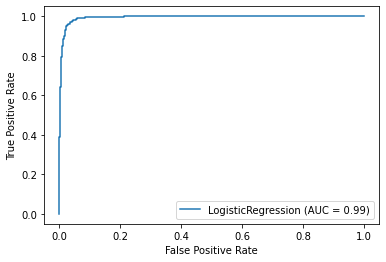

In [106]:
#metrics for Logistics Regression
ROC(model,X_test,y_test)

In [107]:
accuracies = []
accuracies.append(model.score(X_test,y_test))

In [108]:
y = []
for val in y_test:
    y.append(val)

In [109]:
PRINT_METRICS('MODEL:LOGISTICS_REGRESSION',y,y_pred,accuracies,0)

MODEL:LOGISTICS_REGRESSION
Precision:0.9694711935361885|Recall:0.9679235191693121|F1_measure:0.9686497228462427|accuracy:0.9690898683457355


In [110]:
#metrics for SVM_LINEAR
accuracies.append(model_linear.score(X_test,y_test))

In [111]:
y_pred = model_linear.predict(X_test)

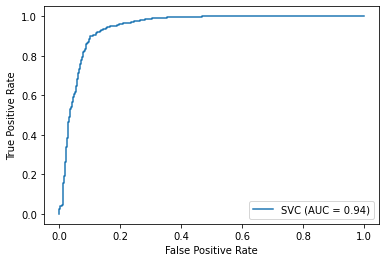

In [112]:
ROC(model_linear,X_test,y_test)

In [113]:
PRINT_METRICS('MODEL:SVM(LINEAR)',y,y_pred,accuracies,1)

MODEL:SVM(LINEAR)
Precision:0.6595359655094168|Recall:0.518661678363256|F1_measure:0.3551983062172224|accuracy:0.4659416141957642


In [114]:
#metrics for SVM(RBF)
accuracies.append(model_rbf.score(X_test,y_test))

In [115]:
y_pred = model_rbf.predict(X_test)

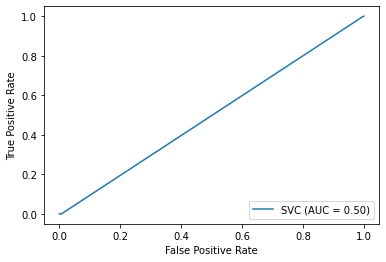

In [116]:
ROC(model_rbf,X_test,y_test)

In [117]:
PRINT_METRICS('MODEL:SVM(RBF)',y,y_pred,accuracies,2)

MODEL:SVM(RBF)
Precision:0.22129735935706085|Recall:0.49677835051546393|F1_measure:0.3061953931691819|accuracy:0.4413279908414425
